In [1]:
import pandas as pd

train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')
submission = pd.read_csv('Sample_Submission_QChS6c3.csv')
train = train.set_index('ID')

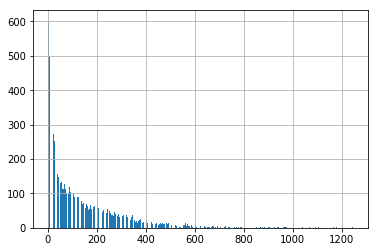

In [2]:
import matplotlib.pyplot as plt
train.Count.hist(bins=1000)
plt.show()

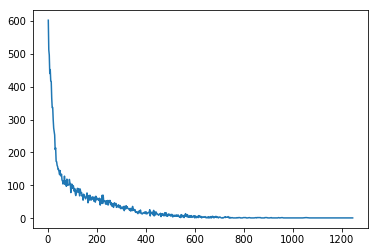

In [3]:
plt.plot(train.Count.value_counts().sort_index())
plt.show()

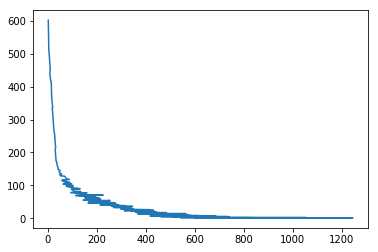

In [4]:
plt.plot(train.Count.value_counts().sort_values(ascending=False))
plt.show()

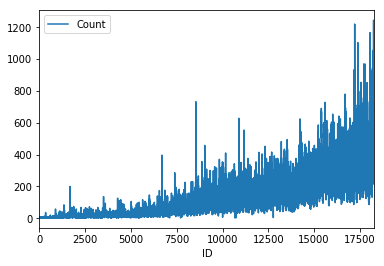

In [5]:
train.plot()
plt.show()

# Simple solution - last 10% mean value

In [6]:
test['Count']=train.Count.iloc[int(len(train.Count)*0.9):].mean()
#test = test.set_index('ID')
#test = test.drop('Datetime', axis=1)
test.to_csv('test_mean.csv')
#test

# Simple solution - last 10% median value

In [67]:
test['Count']=train.Count.iloc[int(len(train.Count)*0.9):].median()
#test = test.set_index('ID')
#test = test.drop('Datetime', axis=1)
test.to_csv('Test_0qrQsBZ.csv')
#test

# Problem Statement

Welcome DataHacker!
 
Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

# Evaluation Metric:

Root Mean Squre Error (RMSE) is the evaluation metric for this contest

Note: Public and private split is 20:80 where first 44 days in public and next 169 days in private 

In [7]:
data = train.copy()

In [8]:
data['Date'] = pd.to_datetime(data['Datetime'], dayfirst=True).dt.date

In [9]:
start_date = data.Date.min()
end_date = data.Date.max()
bdates = pd.bdate_range(start=start_date, end=end_date)

In [14]:
bdates = pd.DataFrame(bdates)
bdates.columns = ['Date']
bdates['Date'] = pd.to_datetime(bdates['Date'], dayfirst=True).dt.date
bdates['Bday']=1

#bdates

In [15]:
data_bday = pd.merge(data, bdates, how='left', on='Date')
data_bday = data_bday.fillna(0)

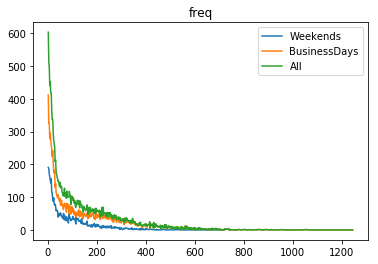

In [16]:
plt.plot(data_bday[data_bday['Bday']==0].Count.value_counts().sort_index(), label='Weekends')
plt.plot(data_bday[data_bday['Bday']==1].Count.value_counts().sort_index(), label='BusinessDays')
plt.plot(data_bday.Count.value_counts().sort_index(), label='All')
plt.legend()
plt.title('freq')
plt.show()

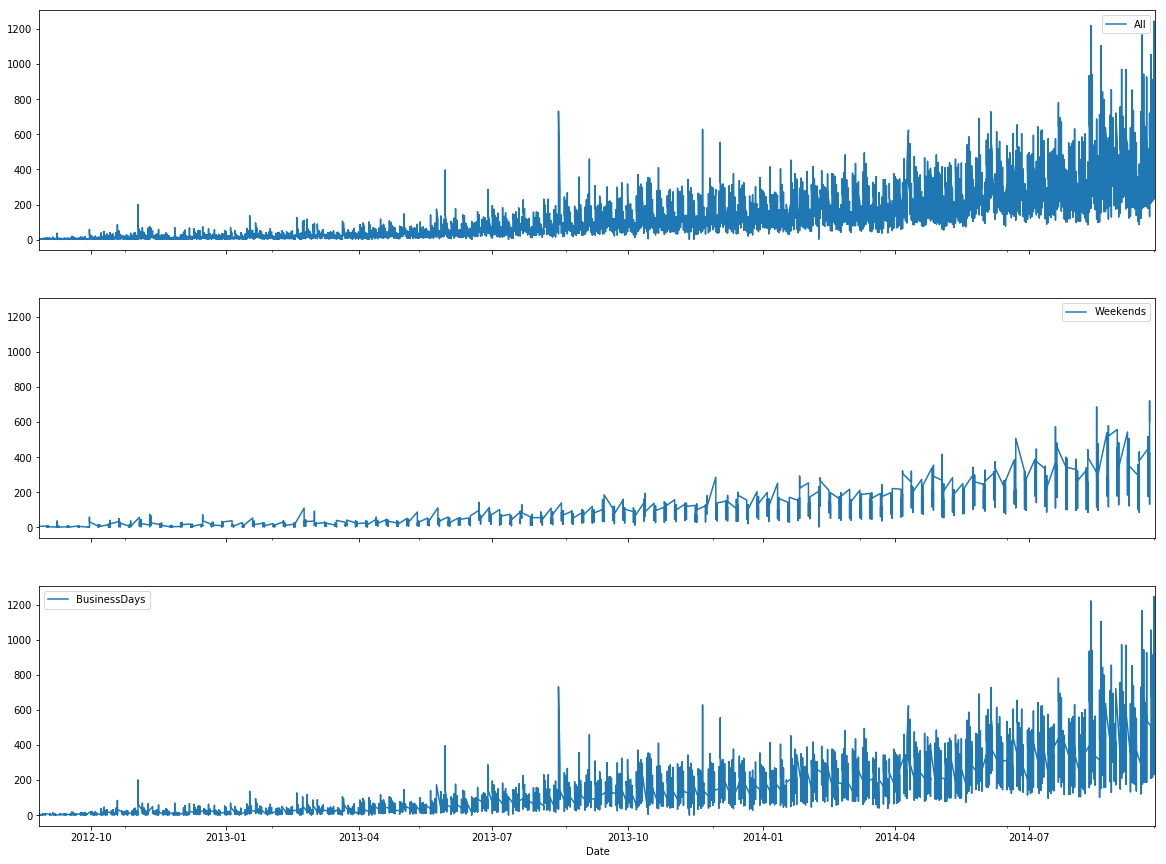

In [17]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(20,15))
data_bday.plot(x='Date', y='Count', label='All', ax=ax[0])
data_bday[data_bday['Bday']==0].plot(x='Date', y='Count', label='Weekends', ax=ax[1])
data_bday[data_bday['Bday']==1].plot(x='Date', y='Count', label='BusinessDays', ax=ax[2])
plt.legend()
#plt.title('Count')
plt.show()

# Simple solution - last 10% mean value 
weekends and business days separately

In [18]:
percentile = 0.9
split_point = int(len(data_bday[data_bday['Bday']==0])*percentile)
weekend_days_mean = data_bday[data_bday['Bday']==0].Count.iloc[split_point:].mean()
split_point = int(len(data_bday[data_bday['Bday']==1])*percentile)
business_days_mean = data_bday[data_bday['Bday']==1].Count.iloc[split_point:].mean()
weekend_days_mean, business_days_mean

(286.24045801526717, 449.62787136294025)

(358.31089743589746, 430.795020746888) #before change in dates

(312.4732824427481, 374.72588055130166) #after change in dates (index sort)

(286.24045801526717, 449.62787136294025) #after dayfist=True error

In [19]:
test = pd.read_csv('Test_0qrQsBZ original.csv')
start_test = test.Datetime.min()
end_test = test.Datetime.max()
bdates_test = pd.bdate_range(start=start_test, end=end_test)

In [20]:
bdates_test = pd.DataFrame(bdates_test)
bdates_test.columns = ['Date']
bdates_test['Date'] = pd.to_datetime(bdates_test['Date'], dayfirst=True).dt.date
bdates_test['Bday']=1
#bdates_test

In [21]:
test['Date']=pd.to_datetime(test['Datetime'], dayfirst=True).dt.date

In [22]:
test_bday = pd.merge(test, bdates_test, how='left', on='Date')
test_bday = test_bday.fillna(0)
test_bday['Count'] = None

In [23]:
test_bday.loc[test_bday['Bday']==0, 'Count']=weekend_days_mean
test_bday.loc[test_bday['Bday']==1, 'Count']=business_days_mean

In [24]:
test_bday = test_bday.set_index('ID')
test_bday = test_bday.drop(['Datetime', 'Date', 'Bday'], axis=1)
#test_bday
test_bday.to_csv('Test_0qrQsBZ.csv')

# =============================================================

In [25]:
data_bday = pd.merge(data, bdates, how='left', on='Date')
data_bday = data_bday.fillna(0)

In [26]:
data_bday.index.max()

18287

In [27]:
data_bday['Datetime'] = pd.to_datetime(data_bday['Datetime'], dayfirst=True)
data_bday = data_bday.set_index('Datetime')
data_bday = data_bday.drop('Date', axis=1)

In [28]:
len(data_bday[data_bday['Bday']==1])

13056

In [29]:
data_bday = data_bday.sort_index()

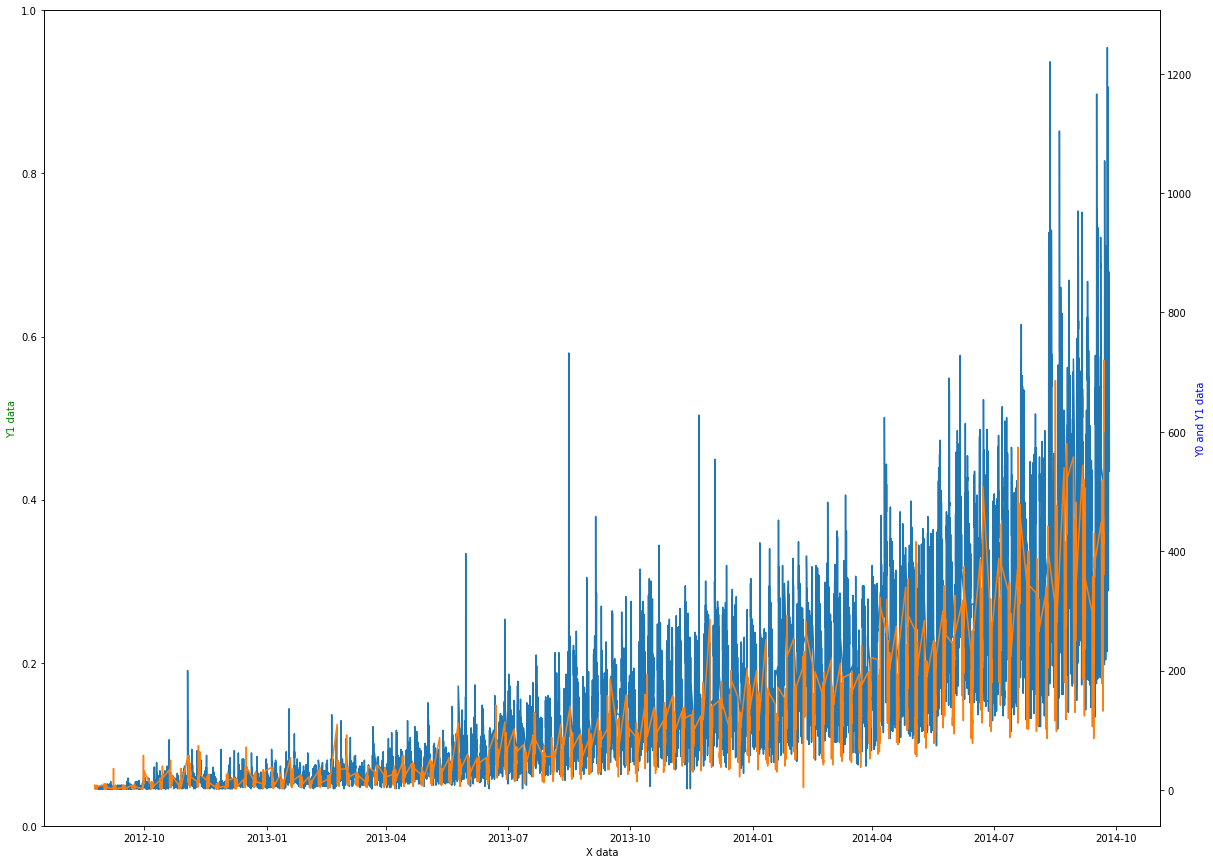

In [30]:
y0= data_bday.loc[data_bday['Bday']==0, 'Count']
y1= data_bday.loc[data_bday['Bday']==1, 'Count']
y2= data_bday.Bday

fig, ax1 = plt.subplots( figsize=(20,15))

ax2 = ax1.twinx()

#ax1.plot(y2)
ax2.plot(y1)
ax2.plot(y0)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y0 and Y1 data', color='b')

plt.show()

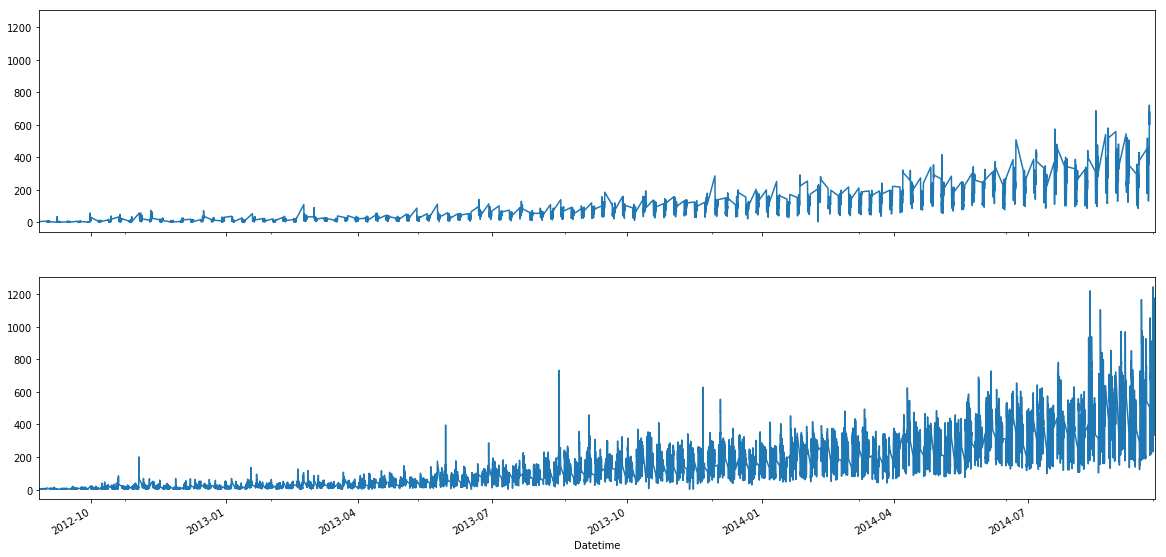

In [31]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(20,10))
data_bday.loc[data_bday['Bday']==0, 'Count'].plot(ax=ax[0])
data_bday.loc[data_bday['Bday']==1, 'Count'].plot(ax=ax[1])
#plt.xlim(start_date, '2015-09-25')
plt.show()

# Dickey-Fuller test for stationarity - feed function with Series for example: test_stationarity(df.ColumnName)

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean() #pd.rolling_mean(timeseries, window=24)
    rolstd = timeseries.rolling(24).mean() #pd.rolling_std(timeseries, window=24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\PNaF\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [58]:
temp0 = data_bday[data_bday['Bday']==0].drop('Bday', axis=1)
temp1 = data_bday[data_bday['Bday']==1].drop('Bday', axis=1)
temp =  data_bday.drop('Bday', axis=1)

In [181]:
#temp = temp['2013':'2014-09']
#temp0 = temp0['2013':'2014-09']
#temp1 = temp1['2013':'2014-09']

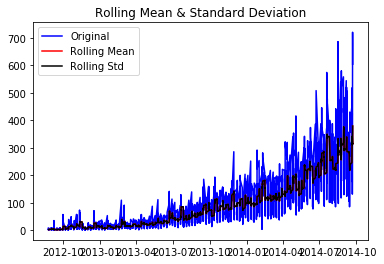

Results of Dickey-Fuller Test:
Test Statistic                   -0.774206
p-value                           0.826582
#Lags Used                       32.000000
Number of Observations Used    5199.000000
Critical Value (5%)              -2.862096
Critical Value (10%)             -2.567066
Critical Value (1%)              -3.431608
dtype: float64


In [34]:
test_stationarity(temp0.Count)

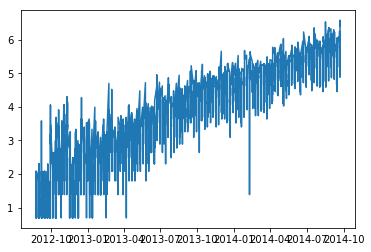

In [35]:
import numpy as np
temp0_log = np.log(temp0)
plt.plot(temp0_log)
plt.show()

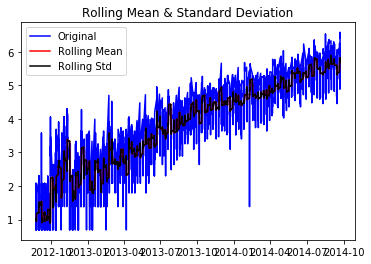

Results of Dickey-Fuller Test:
Test Statistic                   -2.282370
p-value                           0.177717
#Lags Used                       32.000000
Number of Observations Used    5199.000000
Critical Value (5%)              -2.862096
Critical Value (10%)             -2.567066
Critical Value (1%)              -3.431608
dtype: float64


In [36]:
test_stationarity(temp0_log.Count)

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomp(timeseries, freq):
    decomposition = seasonal_decompose(timeseries, freq=freq)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(20,10))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

    plt.show()

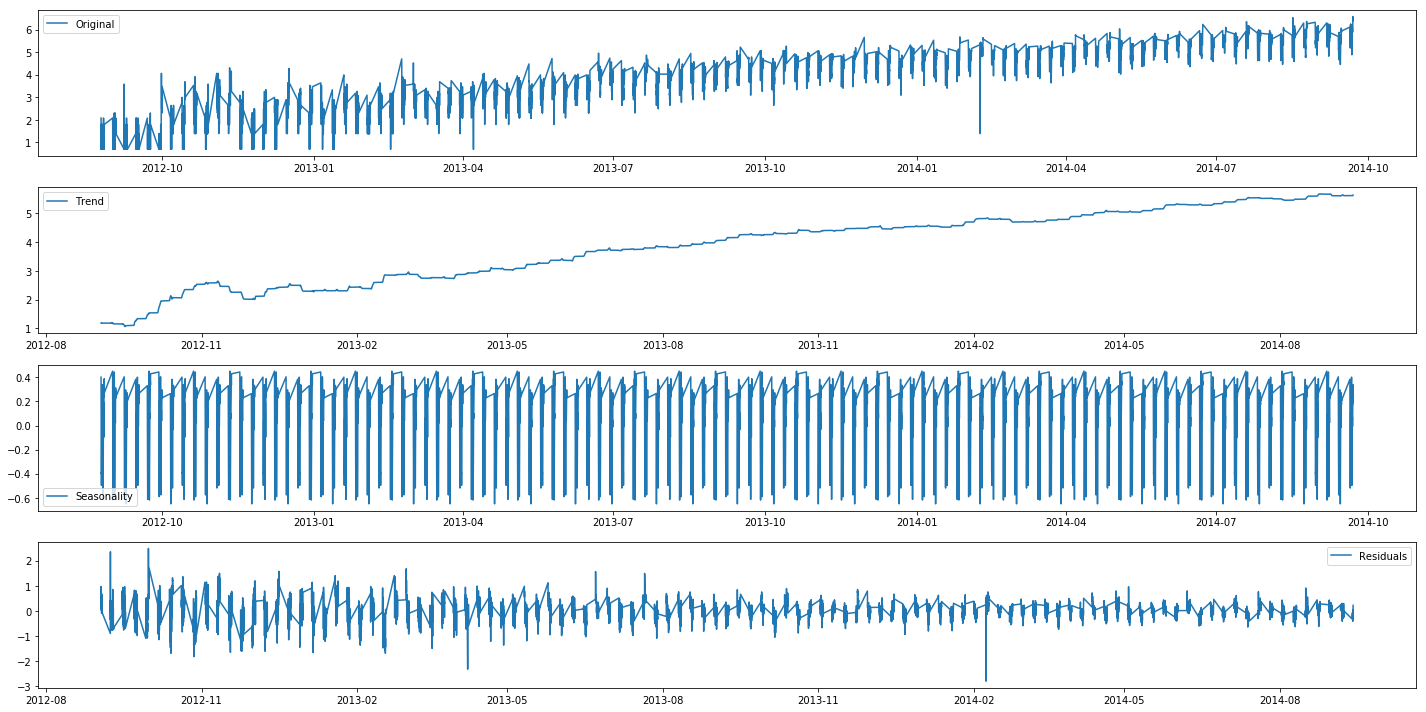

In [41]:
decomp(temp0_log.Count, 24*7)

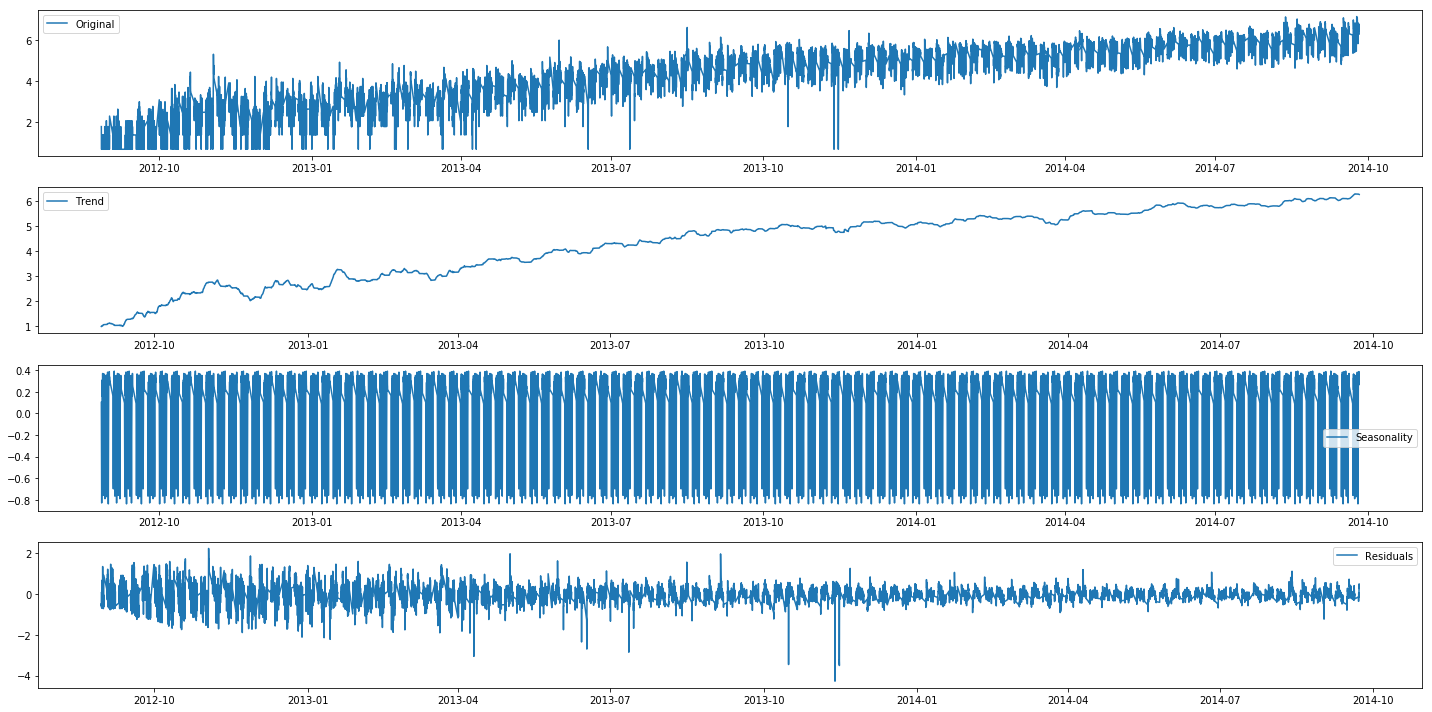

In [42]:
temp1_log = np.log(temp1)
decomp(temp1_log.Count, 24*7)

In [43]:
temp_log = np.log(temp)

NameError: name 'temp' is not defined

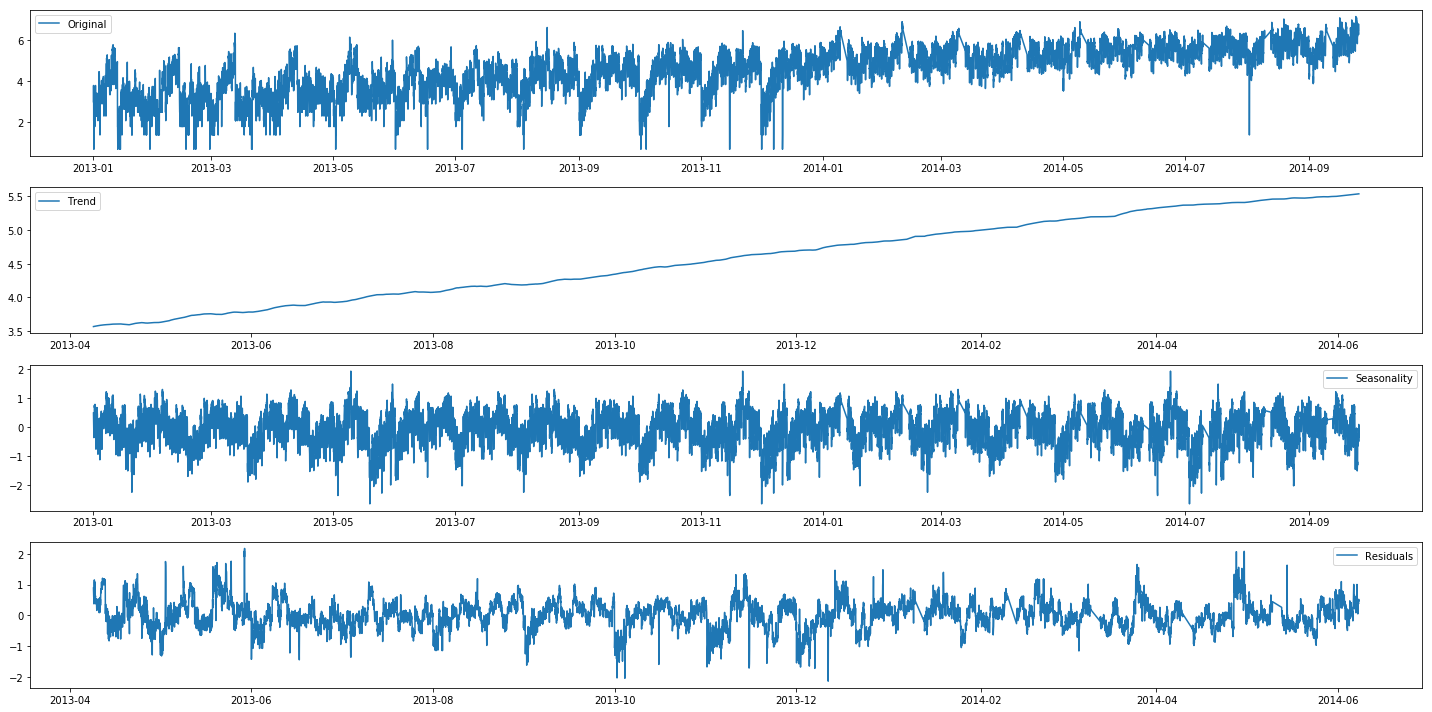

In [191]:
decomp(temp_log.Count, 24*7*28)

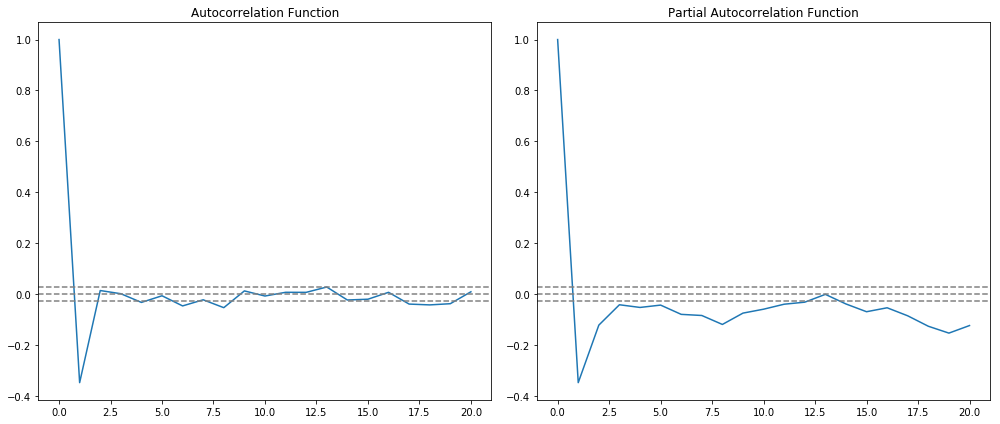

In [44]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

nlags = 20

def log_diff(timeseries):
    ts_log = np.log(timeseries)
    ts_log_diff = ts_log - ts_log.shift()
    ts_log_diff.dropna(inplace=True)
    return ts_log_diff

ts_log_diff = log_diff(temp0) 
lag_acf = acf(ts_log_diff, nlags=nlags)
lag_pacf = pacf(ts_log_diff, nlags=nlags, method='ols')

#Plot ACF: 
plt.figure(figsize=(14,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [45]:
ts_log = temp0_log

# AR Model

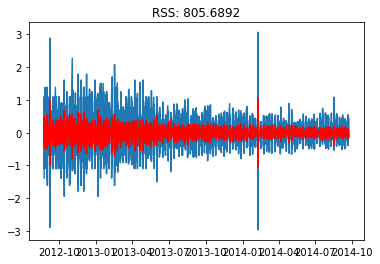

In [46]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff.Count)**2))
plt.show()

# MA Model

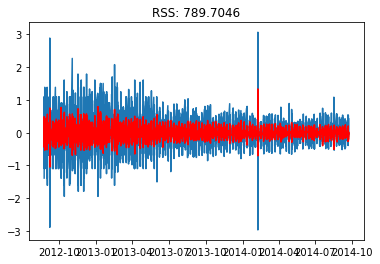

In [47]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff.Count)**2))
plt.show()

# Combined Model

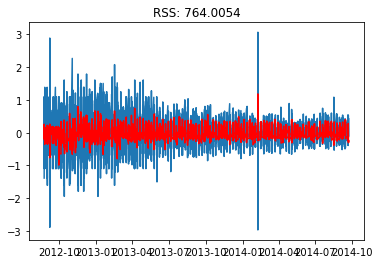

In [48]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff.Count)**2))
plt.show()

# Taking it back to original scale

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Datetime
2012-08-25 01:00:00    0.000891
2012-08-25 02:00:00    0.258365
2012-08-25 03:00:00   -0.017845
2012-08-25 04:00:00    0.243898
2012-08-25 05:00:00    0.214816
dtype: float64

In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Datetime
2012-08-25 01:00:00    0.000891
2012-08-25 02:00:00    0.259256
2012-08-25 03:00:00    0.241411
2012-08-25 04:00:00    0.485309
2012-08-25 05:00:00    0.700125
dtype: float64

In [51]:
predictions_ARIMA_log = pd.Series(ts_log.Count, index=ts_log.index)
#print(predictions_ARIMA_log)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    0.694038
2012-08-25 02:00:00    2.051015
2012-08-25 03:00:00    0.934558
2012-08-25 04:00:00    1.178456
dtype: float64

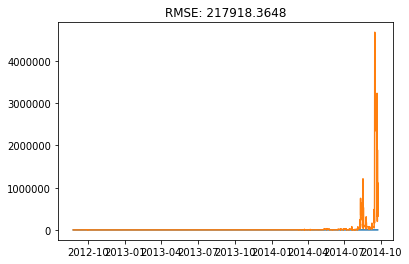

In [53]:
ts = temp0
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts.Count)**2)/len(ts)))
plt.show()

In [54]:
predictions_ARIMA.head()

Datetime
2012-08-25 00:00:00    8.000000
2012-08-25 01:00:00    2.001782
2012-08-25 02:00:00    7.775791
2012-08-25 03:00:00    2.546088
2012-08-25 04:00:00    3.249354
dtype: float64

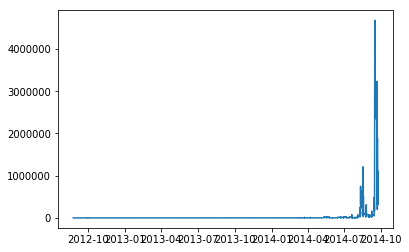

In [55]:
plt.plot(predictions_ARIMA)
plt.show()

# Prophet

In [101]:
import pandas as pd
from fbprophet import Prophet

df = temp1

In [102]:
df = df.reset_index()

In [103]:
df['Datetime']= pd.DatetimeIndex(df['Datetime'])
df.dtypes

Datetime    datetime64[ns]
Count                int64
dtype: object

In [261]:
#temp0 = temp0.set_index('Datetime')

In [266]:
#temp0=temp0.drop('index',axis=1)

In [104]:
df.head(5)

,Datetime,Count
0,2012-08-27 00:00:00,6
1,2012-08-27 01:00:00,2
2,2012-08-27 02:00:00,2
3,2012-08-27 03:00:00,2
4,2012-08-27 04:00:00,2


In [105]:
df = df.rename(columns={'Datetime': 'ds',
                        'Count': 'y'})

df.head(5)

,ds,y
0,2012-08-27 00:00:00,6
1,2012-08-27 01:00:00,2
2,2012-08-27 02:00:00,2
3,2012-08-27 03:00:00,2
4,2012-08-27 04:00:00,2


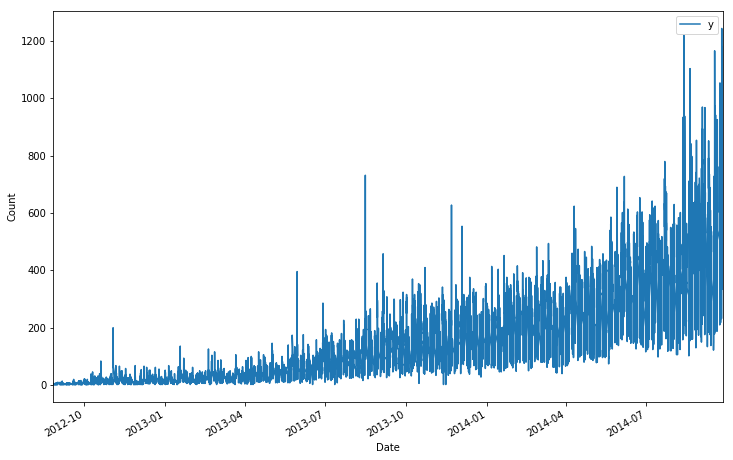

In [107]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Count')
ax.set_xlabel('Date')

plt.show()

In [108]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

In [110]:
future_dates = my_model.make_future_dataframe(periods=24*213, freq='H')
future_dates.tail()

,ds
18163,2015-04-26 19:00:00
18164,2015-04-26 20:00:00
18165,2015-04-26 21:00:00
18166,2015-04-26 22:00:00
18167,2015-04-26 23:00:00


In [111]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18163,2015-04-26 19:00:00,906.943262,710.636650,1097.536677
18164,2015-04-26 20:00:00,905.855608,708.632654,1109.581920
18165,2015-04-26 21:00:00,906.264949,712.621347,1107.092250
18166,2015-04-26 22:00:00,905.935338,715.057877,1101.095140
18167,2015-04-26 23:00:00,899.237151,712.705880,1095.001414


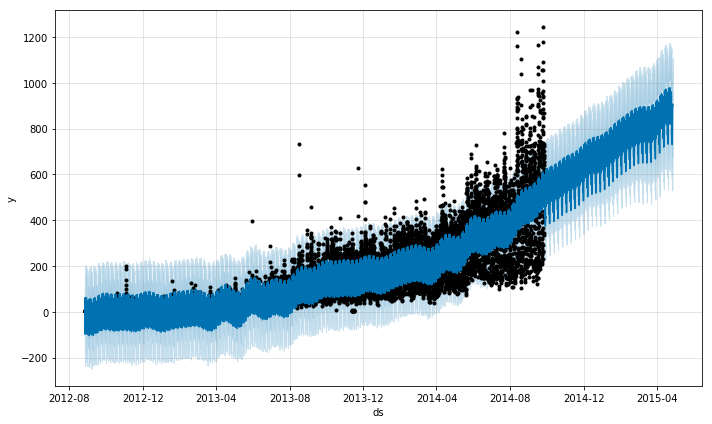

In [112]:
my_model.plot(forecast, uncertainty=True)

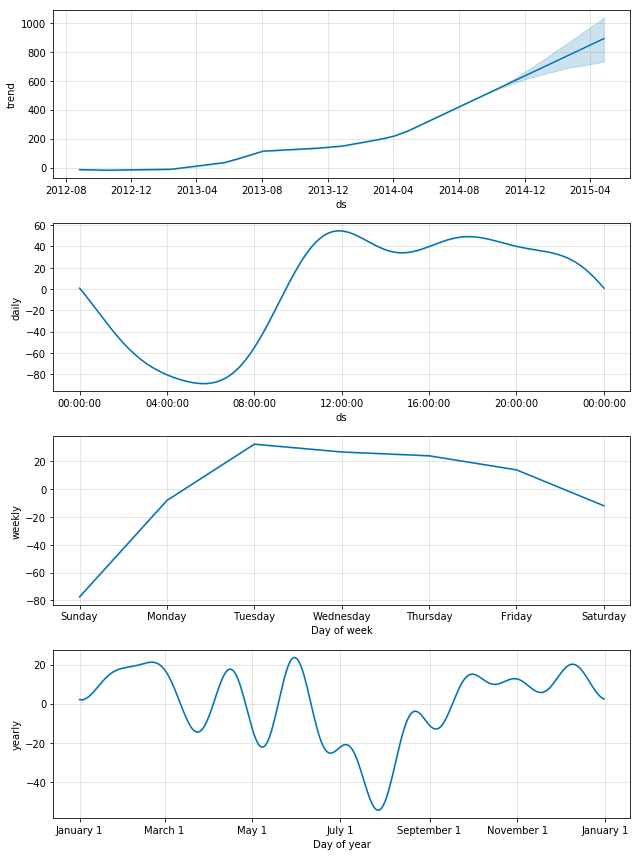

In [113]:
my_model.plot_components(forecast)

In [114]:
#temp0_pred = forecast[['ds', 'yhat']][-213*24:].copy()
#temp1_pred = forecast[['ds', 'yhat']][-213*24:].copy()
#temp_pred = forecast[['ds', 'yhat']][-213*24:].copy()

In [397]:
#temp0_pred
#temp1_pred
#temp_pred

# Prophet solution - bdays and weekends separately

In [115]:
test = pd.read_csv('Test_0qrQsBZ original.csv')

In [116]:
test = pd.read_csv('Test_0qrQsBZ original.csv')
test['Datetime'] = pd.to_datetime(test['Datetime'], dayfirst=True)
start_test = test.Datetime.min()
end_test = test.Datetime.max()
bdates_test = pd.bdate_range(start=start_test, end=end_test)

In [117]:
bdates_test = pd.DataFrame(bdates_test)
bdates_test.columns = ['Date']
bdates_test['Date'] = pd.to_datetime(bdates_test['Date'], dayfirst=True).dt.date
bdates_test['Bday']=1
#bdates_test

In [118]:
pred_weekends = temp0_pred.rename(columns={'ds':'Datetime', 'yhat':'Count'}).copy()
pred_weekends['Date'] = pd.to_datetime(pred_weekends['Datetime'], dayfirst=True).dt.date
print(pred_weekends.head())
pred_bdays = temp1_pred.rename(columns={'ds':'Datetime', 'yhat':'Count'}).copy()
pred_bdays['Date'] = pd.to_datetime(pred_bdays['Datetime'], dayfirst=True).dt.date
print(pred_bdays.head())

                Datetime       Count        Date
5328 2014-09-26 00:00:00  767.032362  2014-09-26
5329 2014-09-26 01:00:00  742.168361  2014-09-26
5330 2014-09-26 02:00:00  714.716199  2014-09-26
5331 2014-09-26 03:00:00  688.261777  2014-09-26
5332 2014-09-26 04:00:00  665.229444  2014-09-26
                 Datetime       Count        Date
13056 2014-09-26 00:00:00  545.034856  2014-09-26
13057 2014-09-26 01:00:00  519.046980  2014-09-26
13058 2014-09-26 02:00:00  494.209442  2014-09-26
13059 2014-09-26 03:00:00  475.974760  2014-09-26
13060 2014-09-26 04:00:00  464.717886  2014-09-26


In [119]:
pred_weekends = pd.merge(pred_weekends, bdates_test, how='left', on='Date')
pred_bdays = pd.merge(pred_bdays, bdates_test, how='left', on='Date')

In [120]:
pred_weekends = pred_weekends.fillna(0)
pred_weekends = pred_weekends[pred_weekends['Bday']==0]
pred_bdays = pred_bdays.fillna(0)
pred_bdays = pred_bdays[pred_bdays['Bday']==1]

In [121]:
print(pred_weekends.head())
print(pred_bdays.head())

              Datetime       Count        Date  Bday
24 2014-09-27 00:00:00  377.348897  2014-09-27   0.0
25 2014-09-27 01:00:00  355.201328  2014-09-27   0.0
26 2014-09-27 02:00:00  333.101270  2014-09-27   0.0
27 2014-09-27 03:00:00  314.455880  2014-09-27   0.0
28 2014-09-27 04:00:00  301.490682  2014-09-27   0.0
             Datetime       Count        Date  Bday
0 2014-09-26 00:00:00  545.034856  2014-09-26   1.0
1 2014-09-26 01:00:00  519.046980  2014-09-26   1.0
2 2014-09-26 02:00:00  494.209442  2014-09-26   1.0
3 2014-09-26 03:00:00  475.974760  2014-09-26   1.0
4 2014-09-26 04:00:00  464.717886  2014-09-26   1.0


In [122]:
pred_weekends['Datetime'] = pd.to_datetime(pred_weekends['Datetime'], dayfirst=True)
pred_weekends = pred_weekends.set_index('Datetime')
pred_weekends = pred_weekends.drop(['Date', 'Bday'], axis=1)

pred_bdays['Datetime'] = pd.to_datetime(pred_bdays['Datetime'], dayfirst=True)
pred_bdays = pred_bdays.set_index('Datetime')
pred_bdays = pred_bdays.drop(['Date', 'Bday'], axis=1)

In [123]:
final_pred = pd.concat([pred_weekends, pred_bdays])

In [124]:
final_pred = final_pred.sort_index()

In [125]:
final_pred['ID']=range(18288, 23400)

In [126]:
final_pred = final_pred.set_index('ID')

In [127]:
final_pred.to_csv('Test_0qrQsBZ.csv')

# Prophet solution - bdays and weekends combined

In [72]:
test = pd.read_csv('Test_0qrQsBZ original.csv')

In [73]:
test = pd.read_csv('Test_0qrQsBZ original.csv')
test['Datetime'] = pd.to_datetime(test['Datetime'], dayfirst=True)
start_test = test.Datetime.min()
end_test = test.Datetime.max()
bdates_test = pd.bdate_range(start=start_test, end=end_test)

In [74]:
bdates_test = pd.DataFrame(bdates_test)
bdates_test.columns = ['Date']
bdates_test['Date'] = pd.to_datetime(bdates_test['Date'], dayfirst=True).dt.date
bdates_test['Bday']=1
#bdates_test

In [75]:
pred = temp_pred.rename(columns={'ds':'Datetime', 'yhat':'Count'}).copy()
pred.head()

,Datetime,Count
18288,2014-09-26 00:00:00,510.564784
18289,2014-09-26 01:00:00,488.075065
18290,2014-09-26 02:00:00,465.451109
18291,2014-09-26 03:00:00,447.896398
18292,2014-09-26 04:00:00,436.765097


In [76]:
final_pred = pred.copy()

In [77]:
final_pred['ID']=range(18288, 23400)

In [78]:
final_pred = final_pred.set_index('ID')

In [79]:
final_pred = final_pred.drop('Datetime', axis=1)

In [81]:
final_pred.to_csv('Test_0qrQsBZ.csv')

# isin

In [157]:
data[data.Date.isin(bdates.Date)]

,Datetime,Count,Date
ID,,,
48,27-08-2012 00:00,6,2012-08-27
49,27-08-2012 01:00,2,2012-08-27
50,27-08-2012 02:00,2,2012-08-27
51,27-08-2012 03:00,2,2012-08-27
52,27-08-2012 04:00,2,2012-08-27
53,27-08-2012 05:00,2,2012-08-27
54,27-08-2012 06:00,4,2012-08-27
55,27-08-2012 07:00,2,2012-08-27
56,27-08-2012 08:00,2,2012-08-27
